# Superposición de ondas propagantes

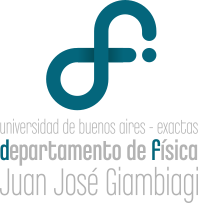  

©2021 [Víctor A. Bettachini](mailto:bettachini@df.uba.ar)  

---

## Enunciado

Una cuerda de longitud $L = 0.6\,\mathrm{m}$, fija en sus dos extremos, oscila en uno de sus modos normales.
La velocidad de propagación de las ondas en dicha cuerda es \\(v = 80\,\mathrm{m\,s^{-1}}\\).
En el momento que presenta su máxima amplitud pico a pico ésta es de \\(8\,\mathrm{mm}\\).  
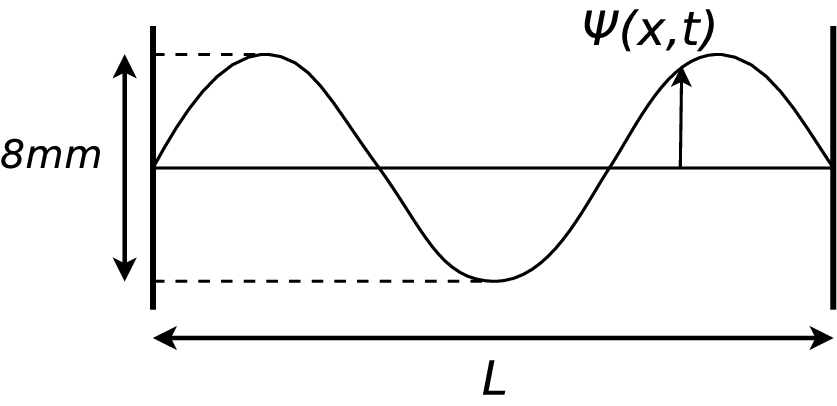

1. Escribir $\psi(x,t)$, sabiendo que $\psi(x,0) = 0\;\forall x$, y que $\dot{\psi}(L/2,0) > 0$.
1. Hallar las ondas propagantes $\psi_{1,2}$ tales que $\psi(x,t)$ sea una combinación lineal de éstas.

## Escribir $\psi(x,t)$

### Modos normales de una cuerda con extremos fijos

Sabemos que la solución general para cada modo \\((p)\\) es

In [1]:
import sympy as sym
from sympy.physics import mechanics as mech
mech.init_vprinting() # notación con punto para la velocidad y punto punto para la aceleración
import warnings
warnings.filterwarnings("ignore")

In [2]:
B_p = sym.Symbol(r'B^{(p)}')
C_p = sym.Symbol(r'C^{(p)}')
omega_p = sym.Symbol('\omega^{(p)}')
k_p = sym.Symbol('k^{(p)}')
phi_p = sym.Symbol('\phi^{(p)}')

t = sym.Symbol('t')
x = sym.Symbol('x')
psi_p = sym.Function('\psi^{(p)}')(x,t)
psi_modo = sym.Eq(psi_p,
                     (B_p* sym.sin(k_p* x) + C_p* sym.cos(k_p* x) )*  sym.cos(omega_p* t + phi_p) )
psi_modo

#### Extremo fijo en $x= 0$

In [5]:
psi_z0 = psi_modo.subs(x, 0)
psi_z0

al ser un extremo fijo

In [6]:
psi_z0 = psi_z0.subs(psi_z0.lhs, 0)
psi_z0

Se cumple con

In [7]:
parteTemporal = psi_z0.args[1].args[1]
C_p = psi_z0.args[1].args[0]
C_p_z0 = sym.Eq(C_p, sym.solve(psi_z0.rhs/ parteTemporal, C_p)[0] )
C_p_z0

Así

In [8]:
psi_gauche = psi_modo.subs(C_p_z0.lhs, C_p_z0.rhs)
psi_gauche

#### Extremo fijo en \\(x= L\\)

In [10]:
L = sym.Symbol('L', positive= True)
psi_zL = psi_gauche.subs(x, L)
psi_zL

siendo también un extremo fijo

In [11]:
psi_zL = psi_zL.subs(psi_zL.lhs, 0)
psi_zL

establece los valores que puede tomar el número de onda

In [12]:
parteEspacial = psi_zL.rhs.args[2]
k_p = parteEspacial.args[0].args[0]
k_p_zL = sym.Eq(k_p, sym.solveset(parteEspacial, k_p), evaluate= False)
k_p_zL

Esto se resume en

In [13]:
k_p_droit = sym.Eq(k_p_zL.lhs, k_p_zL.rhs.args[0].args[0].args[1]/2)
k_p_droit

Con la relación de dispersión

In [14]:
v = sym.Symbol('v')
relaciónDispersión = sym.Eq(omega_p, v* k_p)
relaciónDispersión

ya puede escribirse la solución para un modo \\(p\\) de este sistema

In [15]:
psi_sistema_substituciones = {
    relaciónDispersión.lhs : relaciónDispersión.rhs,
    C_p_z0.lhs : C_p_z0.rhs,
    k_p_droit.lhs : k_p_droit.rhs,
}
psi_sistema = psi_modo.subs(psi_sistema_substituciones)
psi_sistema

In [ ]:
### Elección del modo 

### Condiciones iniciales

### Identificando el modo en el dibujo

En el dibujo es claro que la **onda estacionaria** se puede representar con un **único armónico**, i.e. una única función trigonométrica.

Analizando que sucede dentro de la longitud \\(L\\) de la cuerda en la figura se puede determinar el modo representado por dos procedimientos equivalentes.
- Midiendo la $\lambda^{(p)}$.
Es fácil ver que hay **una y media** \\(\lambda^{(p)}\\) dentro de \\(L\\) 
$$
\begin{aligned}
    \frac{3}{2} \lambda^{(p)} &= L \\
    \frac{2 \pi}{k^{(p)}} &= \frac{2 L}{3} \\
\end{aligned}
$$

La dependencia espacial responde a

In [56]:
psi_sistema.rhs.args[2]

esto solo presenta **dos nodos**, puntos donde se anula la función, para \\(p= 3\\) que corresponde al **segundo armónico**.

Otra forma de ver lo mismo es ver en el dibjo que 

In [ ]:
Ot

#### $\psi(x,0) = 0\;\forall x$

In [16]:
psi_t0 = psi_sistema.subs(t,0)
psi_t0

In [17]:
psi_t0 = psi_t0.subs(psi_t0.lhs, 0)
psi_t0

De aquí las soluciones para \\(\phi^{(p)}\\) pueden ser

In [21]:
cos_phi = psi_t0.rhs.args[1]
phi_solve = sym.solveset(psi_t0, phi_p)
phi_solve

Sabemos que con \\(n=0\\) cualquiera de estas funciona para todos los \\(p\\).

In [30]:
phi_p_1 = sym.Eq(sym.Symbol('\phi^{(p)}_1'), phi_solve.args[0].args[0](0) ) 
phi_p_2 = sym.Eq(sym.Symbol('\phi^{(p)}_2'), phi_solve.args[1].args[0](0) ) 
phi_p_1, phi_p_2

Cada una de ellas lleva a una solución distanta de la otra

In [42]:
psi_sistema_1 = psi_sistema.subs(phi_p, phi_p_1.rhs, evaluate= False)
psi_p_1 = sym.Function('\psi^{(p)}_1')(x,t)
psi_sistema_1 = psi_sistema_1.subs(psi_sistema_1.lhs, psi_p_1)
psi_sistema_1

In [44]:
psi_sistema_2 = psi_sistema.subs(phi_p, phi_p_2.rhs, evaluate= False)
psi_p_2 = sym.Function('\psi^{(p)}_2')(x,t)
psi_sistema_2 = psi_sistema_2.subs(psi_sistema_2.lhs, psi_p_2)
psi_sistema_2

¿Cuál de las dos elegir?

#### $\dot{\psi}(L/2,0) > 0$


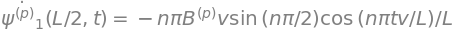

In [50]:
psi_sistema_1_punto = sym.Eq(psi_sistema_1.lhs.diff(t), psi_sistema_1.rhs.diff(t) ).subs(x, L/2)
psi_sistema_1_punto

In [51]:
psi_sistema_1_punto.subs(t,0)

                                                   ⎛n⋅π⎞ 
                                -n⋅π⋅B__{(p)}⋅v⋅sin⎜───⎟ 
⎛∂ ⎛             ⎛L   ⎞⎞⎞│                         ⎝ 2 ⎠ 
⎜──⎜\psi_1__{(p)}⎜─, t⎟⎟⎟│    = ─────────────────────────
⎝∂t⎝             ⎝2   ⎠⎠⎠│t=0               L            